# Simple convolutional layer with NumPy

https://www.programmersought.com/article/81776657913/

In [1]:
#!pip install opencv-python

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
def conv2D_layer(image, kernel, mode='same'):
    
    if mode == 'fill':
        
        h = kernel.shape[0] // 2
        w = kernel.shape[1] // 2
 
        image = np.pad(image, ((h, h), (w, w), (0, 0)), 'constant')
    
    num_input_channels = np.shape(image)[2]
    
    for idx in range(num_input_channels):
         res = _convolve_operation(image[:, :, idx], kernel) / num_input_channels
    
    return res

In [4]:
def _convolve_operation(image, kernel):
    
    h_kernel, w_kernel = kernel.shape
    h_image, w_image = image.shape
 
    res_h = h_image - h_kernel + 1
    res_w = w_image - w_kernel + 1
 
    res = np.zeros((res_h, res_w))
    for i in range(res_h):
        for j in range(res_w):
            res[i, j] = normalize_convolution(image[i:i + h_kernel, j:j + w_kernel], kernel)
    return res
 

In [5]:
def normalize_convolution(image, kernel):
    
    res = np.multiply(image, kernel).sum()
    if res > 255:
        return 255
    elif res < 0:
        return 0
    else:
        return res    

In [6]:
path ='moon_landing.jpg' # Original image path
image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

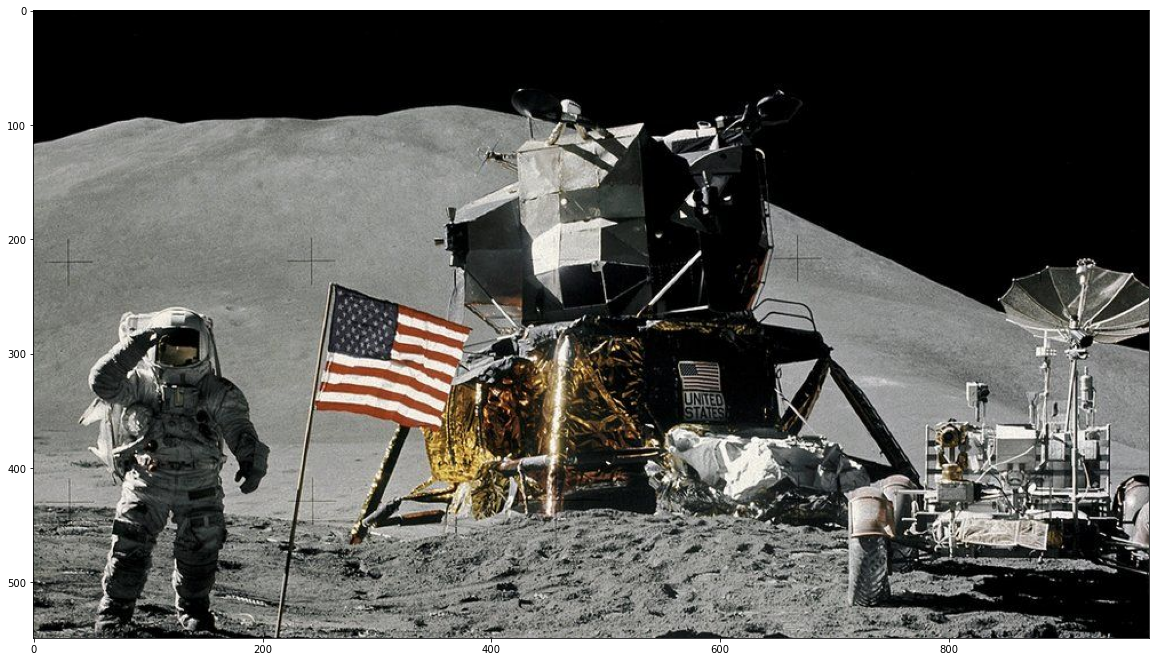

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.show()

In [8]:
# kernel1 is a 3x3 edge feature extractor that can extract edges in all directions

kernel1 = np.array([
    [1,    1,  1],
    [1, -7.3,  1],
    [1,    1,  1]
])

kernel1 = kernel1 / np.product(kernel1.shape)  # Normalize the filter

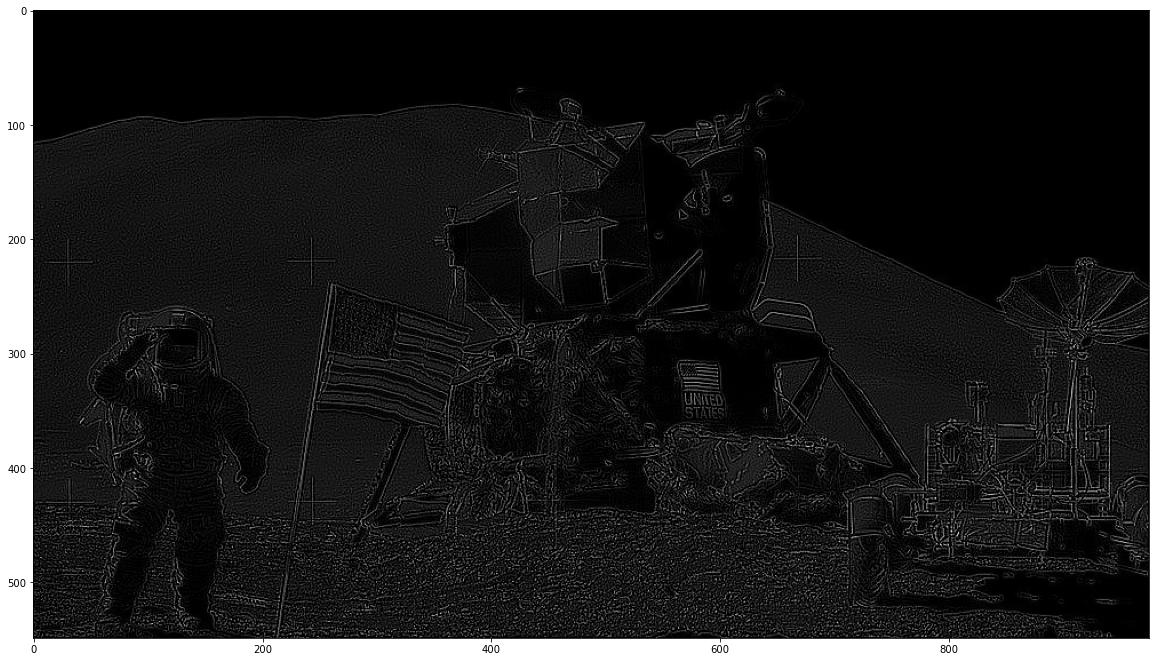

In [9]:
res = conv2D_layer(image, kernel1, 'fill')

plt.figure(figsize=(20,20))
plt.imshow(res, cmap='gray')
plt.show()

In [10]:
# kernel2 is a 5x5 relief feature extractor.

kernel2 = np.array([
    [-1, -1, -1,   -1, 0],
    [-1, -1, -1,    0, 1],
    [-1, -1,  0,    1, 1],
    [-1,  0,  0.6,  1, 2.5],
    [ 0,  1,  1,    1, 3.123]])

kernel2 = kernel2 / np.product(kernel2.shape)  # Normalize the filter

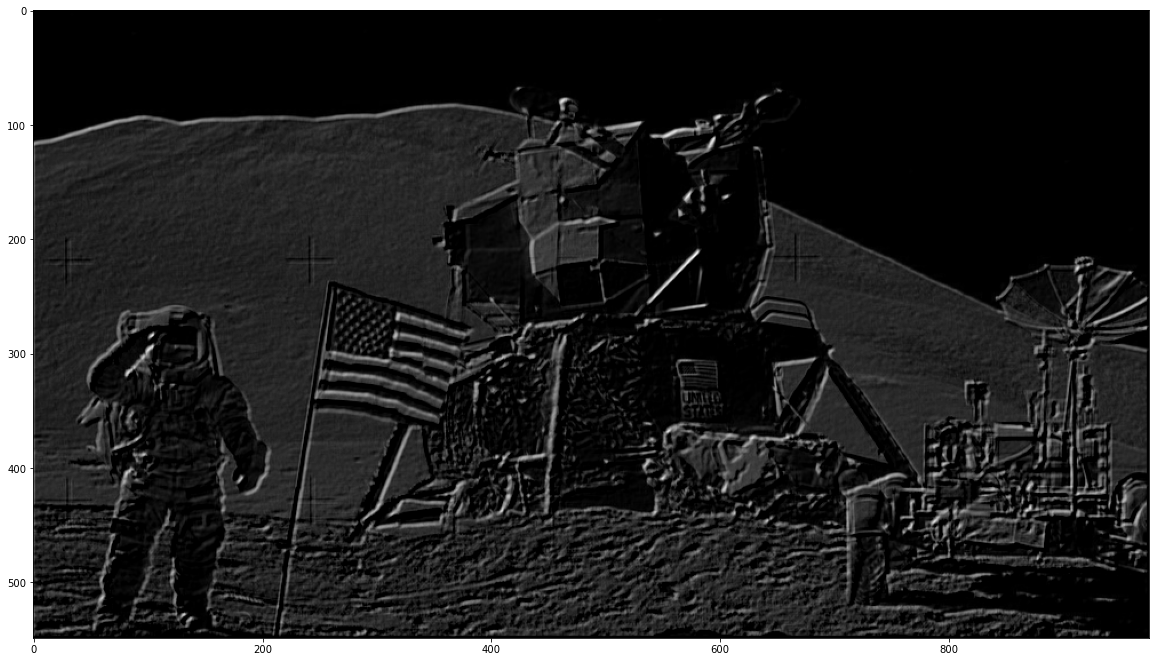

In [11]:
res = conv2D_layer(image, kernel2, 'fill')

plt.figure(figsize=(20,20))
plt.imshow(res, cmap='gray')
plt.show()

In [12]:
# kernel3 is just the identity filter (combines all 3 channels, but only pixelwise)

kernel3 = np.array([
    [0,  0,   0],
    [0,  1,   0],
    [0,  0,   0]
])

kernel3 = kernel3 / np.product(kernel3.shape)  # Normalize the filter

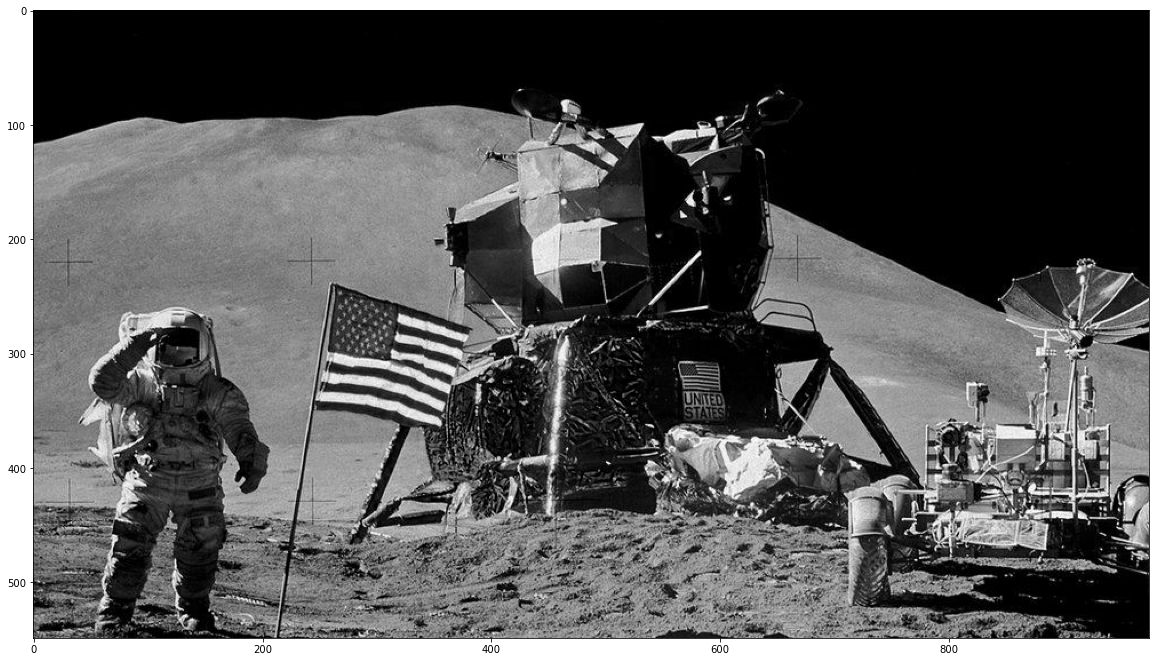

In [13]:
res = conv2D_layer(image, kernel3, 'fill')

plt.figure(figsize=(20,20))
plt.imshow(res, cmap='gray')
plt.show()

In [14]:
# kernel4 is a smoothing filter

# Increasing the filter size makes the image blurrier (because more pixels are being averaged)

kernel_size = 8
kernel4 = np.ones((kernel_size,kernel_size))

kernel4 = kernel4 / np.product(kernel4.shape)  # Normalize the filter

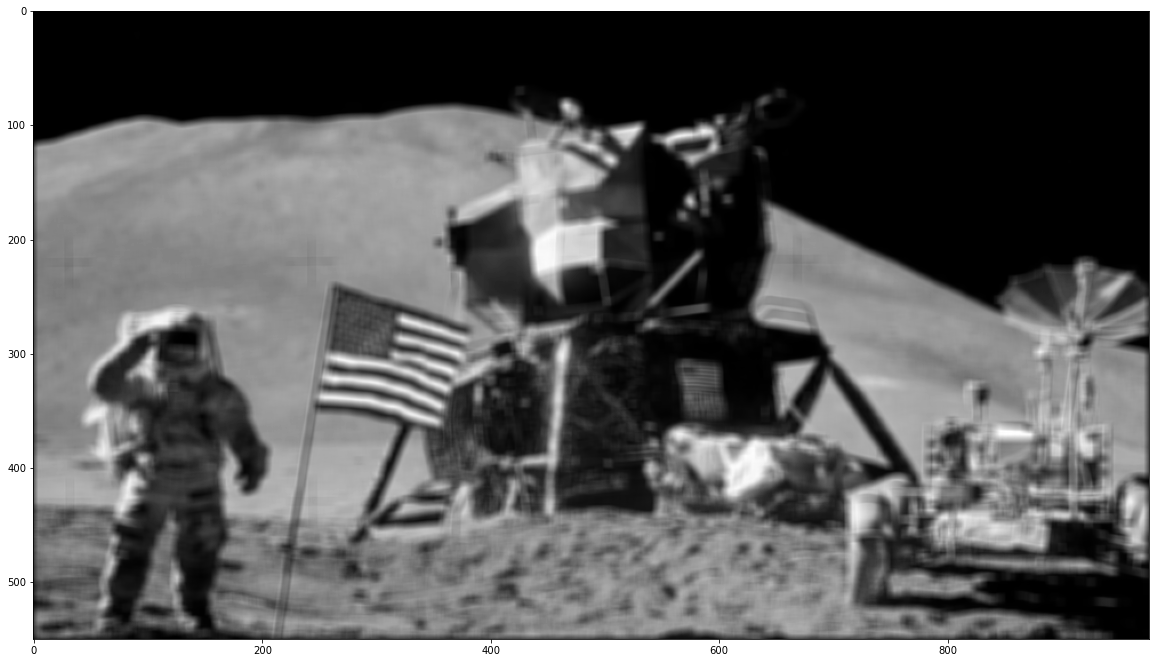

In [15]:
res = conv2D_layer(image, kernel4, 'fill')

plt.figure(figsize=(20,20))
plt.imshow(res, cmap='gray')
plt.show()